Homework for the week - 3 
Build a logistic regression model using Scikit-learn to predict fraudulent transactions by training 
it on this kaggle dataset. 
Before you train the model, create at least 1 visualization of the data using the seaborn library of your choice. This should be submitted as a ""jupyter notebook".

In [27]:
import numpy as np
import pandas as pd

# Read the traing and test data sets
dfi = pd.read_csv('train_identity.csv', low_memory='False')
dft = pd.read_csv('train_transaction.csv', low_memory='False')

dfi_test = pd.read_csv('test_identity.csv', low_memory='False')
dft_test = pd.read_csv('test_transaction.csv', low_memory='False')

# Merge sets with commond id
data_train = pd.merge(dft, dfi, how="left", on="TransactionID")
data_train = data_train.sample(frac=1).reset_index(drop=True)
data_test = pd.merge(dft_test, dfi_test, how="left", on="TransactionID")
data_test = data_test.sample(frac=1).reset_index(drop=True)

# Drop not used data to free memory
dfi = ""
dft = ""
dfi_test = ""
dft_test = ""

data_train.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3154541,0,3598222,100.00,R,7143,555.0,150.0,visa,226.0,...,safari generic,24.0,2560x1600,match_status:2,T,F,F,F,desktop,MacOS
1,3393316,0,10264562,131.00,W,4274,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3163096,0,3807775,62.95,W,1974,111.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3245617,0,6204724,374.95,W,7508,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3124949,0,2791977,87.95,W,2884,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
print(data_test.sample(20))
data_test.head()

        TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
250854        3847044       24777274         319.950         W   3278  453.0   
409869        4141840       33606101         171.000         W  12695  490.0   
486772        3830278       24166394          57.950         W  13511  111.0   
480120        4154188       33780588          25.000         R   7207  111.0   
104997        4006352       30156382          22.133         C  10497  555.0   
113775        4048359       31505006          52.504         C   1164  545.0   
166769        4049299       31522097         159.000         W   7669  455.0   
498367        3935840       27825024          43.897         C  13526  529.0   
17239         4132689       33433725         250.000         R  18268  583.0   
105062        3992160       29678858          57.950         W   8900  385.0   
306744        3828643       24101953         171.000         W   2772  512.0   
255534        4002596       30045957    

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3721108,20366421,554.000,W,17188,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4165854,34095355,113.000,W,10908,582.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3690121,19312870,117.000,W,5409,170.0,150.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3808516,23421092,47.950,W,16661,490.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3849152,24856249,33.445,C,15885,545.0,185.0,visa,138.0,debit,...,chrome 68.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows


In [3]:
import matplotlib.pyplot as plt
fraud = data_train.loc[data_train['isFraud'] == 1]
non_fraud = data_train.loc[data_train['isFraud'] == 0]

print(len(fraud))
print(len(non_fraud))

20663
569877


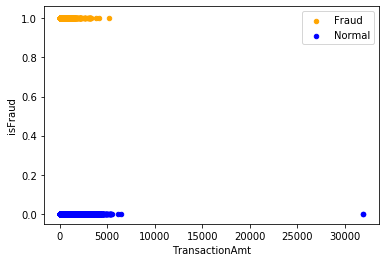

In [4]:
ax = fraud.plot.scatter(x='TransactionAmt', y='isFraud', color='Orange', label='Fraud')
non_fraud.plot.scatter(x='TransactionAmt', y='isFraud', color='Blue', label='Normal', ax=ax)
plt.show()

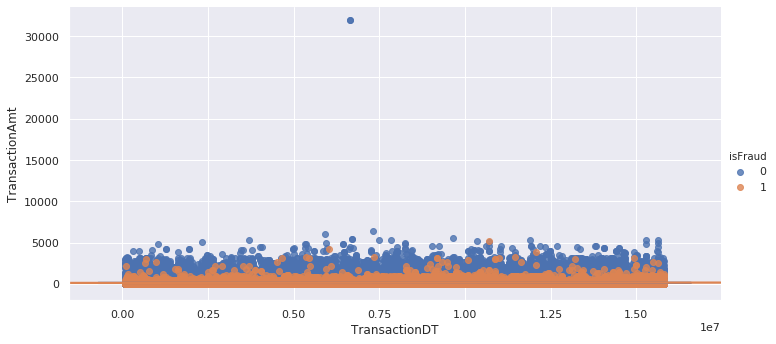

In [6]:
# https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

sns.pairplot(data_train, x_vars=["TransactionDT"], y_vars=["TransactionAmt"], hue="isFraud", height=5, aspect=2, kind="reg");


In [11]:
data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 434 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
card1             590540 non-null int64
card2             581607 non-null float64
card3             588975 non-null float64
card4             588963 non-null object
card5             586281 non-null float64
card6             588969 non-null object
addr1             524834 non-null float64
addr2             524834 non-null float64
dist1             238269 non-null float64
dist2             37627 non-null float64
P_emaildomain     496084 non-null object
R_emaildomain     137291 non-null object
C1                590540 non-null float64
C2                590540 non-null float64
C3                590540 non-null float64
C4                590540 non-null float64
C5                59

In [66]:
# Use some strategy to fill out missing data
# https://www.zestfinance.com/blog/6-methods-for-dealing-with-missing-data

# 1st Drop columns with more than 75% of null values
num_of_nulls = data_train.isna().sum()/len(data_train)
drop_cols = np.array(num_of_nulls[num_of_nulls > 0.75].index)

def drop_and_fill(df, drop_cols):
    df.drop(drop_cols, axis=1, inplace=True)
    df.fillna(-999, inplace=True)
    df.replace([np.inf, -np.inf], -999, inplace=True)
    # return df



In [67]:
drop_and_fill(data_train, drop_cols)
drop_and_fill(data_test, drop_cols)

data_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 226 columns):
TransactionID     590540 non-null int64
isFraud           590540 non-null int64
TransactionDT     590540 non-null int64
TransactionAmt    590540 non-null float64
ProductCD         590540 non-null object
card1             590540 non-null int64
card2             590540 non-null float64
card3             590540 non-null float64
card4             590540 non-null object
card5             590540 non-null float64
card6             590540 non-null object
addr1             590540 non-null float64
addr2             590540 non-null float64
dist1             590540 non-null float64
P_emaildomain     590540 non-null object
C1                590540 non-null float64
C2                590540 non-null float64
C3                590540 non-null float64
C4                590540 non-null float64
C5                590540 non-null float64
C6                590540 non-null float64
C7                

In [68]:
display(data_train.sample(10))

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
444087,3444020,0,11701154,47.950,W,11815,206.0,150.0,mastercard,126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
357407,3511284,0,13787732,50.000,R,16659,170.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252638,3239286,0,6028254,57.950,W,16132,111.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513605,3058666,0,1612852,100.000,R,2375,272.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
554979,3408852,0,10688467,18.549,C,13832,375.0,185.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431128,3203323,1,5022838,12.809,C,10086,500.0,185.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436259,3374115,0,9704906,226.000,W,14080,133.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43924,3436689,0,11469954,59.000,W,12695,490.0,150.0,visa,226.0,...,92.0,390.0,784.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0
566742,3254884,0,6480358,135.500,W,11926,514.0,150.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7008,3120973,0,2672243,68.500,W,15368,543.0,150.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
# Try LogisticRegression

from copy import deepcopy
from sklearn.linear_model import LogisticRegression

X_train = data_train.copy()
y_train = X_train['isFraud']

# Had to drop more columns due objects and strings... there could be ways to preserve some of the data for sure
X_train.drop(['isFraud', 'TransactionID', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', ], axis=1, inplace=True)

display(X_train.sample(5))

lnr_model = LogisticRegression(C=1e5)
lnr_model.fit(X_train, y_train)
print('Score:', lnr_model.score(X_train, y_train))



,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
456326,6395204,21.95,11233,321.0,150.0,195.0,204.0,87.0,8.0,2.0,...,19.950001,31.950001,73.849998,31.950001,0.0,0.0,0.0,0.0,0.0,0.0
83557,7673373,51.00,9500,321.0,150.0,226.0,126.0,87.0,3.0,3.0,...,1048.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
408192,9565831,117.00,7279,562.0,150.0,219.0,181.0,87.0,-999.0,2.0,...,0.000000,300.000000,417.000000,300.000000,117.0,117.0,117.0,0.0,0.0,0.0
145212,1146444,35.95,9678,490.0,150.0,226.0,299.0,87.0,2.0,3.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
181995,10799614,115.00,2884,490.0,150.0,226.0,315.0,87.0,-999.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


/home/storola/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.964860974701121
